# Part 2: Generating an Optimal Schedule for a Single Student

This notebook takes the `master_schedule.csv` generated in Part 1 and finds the best possible, conflict-free schedule for a specific student based on their course registrations.

In [178]:
# Import Libraries and Custom Modules

import pandas as pd
import logging
import time
import sys
import os

# Add the 'src' folder to the Python path to import our modules
module_path = os.path.abspath(os.path.join(os.getcwd(), 'src'))
if module_path not in sys.path:
    sys.path.append(module_path)

# Import the specific classes for student scheduling
try:
    from student_scheduler_ga import StudentData, StudentSchedulerGA
    print("Student scheduler modules imported successfully!")
except ImportError as e:
    print(f"Error importing modules: {e}")
    print(f"Please check that the file 'student_scheduler_ga.py' exists in the '{module_path}' directory.")

Student scheduler modules imported successfully!


In [179]:
# Configure Logging

logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(levelname)-8s - %(message)s',
    force=True # Ensure the config is reapplied in the notebook
)

logging.info("Logging is configured for the student scheduler notebook.")

2025-08-03 18:37:28,664 - INFO     - Logging is configured for the student scheduler notebook.


## 1. Load Input Data

First, we'll load the `master_schedule.csv` file we generated in the previous notebook. We also need the `student_registrations.csv` file to identify which courses our target student is registered for.

In [180]:
# Load the master schedule and student registration data

try:
    # Load the master schedule created by the first notebook
    master_schedule_df = pd.read_csv("master_schedule.csv")
    
    # Load the student registration data from the mock_data folder
    registrations_df = pd.read_csv("mock_data/student_registrations.csv")
    
    logging.info("Master schedule and student registrations loaded successfully.")
    
    print("Sample of the Master Schedule data:")
    display(master_schedule_df.head())
    
    print("\nSample of the Student Registrations data:")
    display(registrations_df.head())

except FileNotFoundError as e:
    logging.error(f"FATAL: {e}. Please ensure 'master_schedule.csv' from the first notebook and 'mock_data/student_registrations.csv' are in the correct locations.")

2025-08-03 18:37:28,684 - INFO     - Master schedule and student registrations loaded successfully.


Sample of the Master Schedule data:


,course_id,teacher_id,room_id,timeslot,Day,Time
0,CS102,2,R101,Monday_12:00,Monday,12:00
1,CS102,2,R101,Monday_15:00,Monday,15:00
2,CS101,1,R201,Sunday_08:00,Sunday,08:00
3,CS202,1,R102,Sunday_10:00,Sunday,10:00
4,CS101,1,R201,Sunday_11:00,Sunday,11:00



Sample of the Student Registrations data:


,student_id,course_id
0,101,CS101
1,101,CS102
2,102,CS201
3,103,CS101
4,103,CS201


## 2. Select Target Student and Prepare Data

Here, we'll specify the ID for the student we want to schedule. We will then use our `StudentData` class to process the data specifically for this student, identifying all the course sections available to them from the master schedule.

In [181]:
# Define the student ID and instantiate the StudentData class

# You can change this ID to schedule for any other student in the registrations file
STUDENT_ID_TO_SCHEDULE = 103 

logging.info(f"Preparing all available lecture options for Student ID: {STUDENT_ID_TO_SCHEDULE}")

try:
    student_data = StudentData(
        student_id=STUDENT_ID_TO_SCHEDULE, 
        master_schedule_df=master_schedule_df, 
        registrations_df=registrations_df
    )
    
    logging.info("Data preparation for the student is complete.")
    print(f"Target Student ID: {student_data.student_id}")
    print(f"Student is registered in the following courses: {student_data.student_courses}")

except ValueError as e:
    logging.error(f"Could not prepare data for the student: {e}")
except NameError:
    logging.error("One of the required dataframes is not defined. Please re-run the previous cells.")
except Exception as e:
    logging.error(f"An unexpected error occurred: {e}")

2025-08-03 18:37:28,703 - INFO     - Preparing all available lecture options for Student ID: 103
2025-08-03 18:37:28,704 - INFO     - Initializing StudentData for student_id: 103
2025-08-03 18:37:28,706 - INFO     - Student 103 is registered in 5 courses: ['CS101', 'CS201', 'CS202', 'CS301', 'CS401']
2025-08-03 18:37:28,708 - INFO     - Data preparation for the student is complete.


Target Student ID: 103
Student is registered in the following courses: ['CS101', 'CS201', 'CS202', 'CS301', 'CS401']


## 3. Configure and Run the Genetic Algorithm

Now we will define the parameters for the student's GA instance, create the scheduler object, and run it to find the optimal schedule.

In [182]:
# Define GA Parameters for the student scheduler

ga_parameters = {
    'generations': 150,
    'sol_per_pop': 200,
    'parents_mating': 20,
    'mutation_percent': 10 
}

logging.info(f"Student GA Parameters set: {ga_parameters}")
print("Student scheduler GA parameters have been defined.")

2025-08-03 18:37:28,718 - INFO     - Student GA Parameters set: {'generations': 150, 'sol_per_pop': 200, 'parents_mating': 20, 'mutation_percent': 10}


Student scheduler GA parameters have been defined.


2025-08-03 18:37:28,745 - INFO     - Initializing StudentSchedulerGA...
2025-08-03 18:37:28,754 - INFO     - StudentSchedulerGA instance created successfully.
2025-08-03 18:37:28,755 - INFO     - Running GA for student 103...
2025-08-03 18:37:28,761 - INFO     - Gen 1 | Best Fitness: 0.025000
2025-08-03 18:37:28,765 - INFO     - Gen 2 | Best Fitness: 0.025000
2025-08-03 18:37:28,773 - INFO     - Gen 3 | Best Fitness: 0.025000
2025-08-03 18:37:28,778 - INFO     - Gen 4 | Best Fitness: 0.025000
2025-08-03 18:37:28,783 - INFO     - Gen 5 | Best Fitness: 0.025000
2025-08-03 18:37:28,787 - INFO     - Gen 6 | Best Fitness: 0.025000
2025-08-03 18:37:28,792 - INFO     - Gen 7 | Best Fitness: 0.025000
2025-08-03 18:37:28,795 - INFO     - Gen 8 | Best Fitness: 0.025000
2025-08-03 18:37:28,799 - INFO     - Gen 9 | Best Fitness: 0.025000
2025-08-03 18:37:28,799 - INFO     - Gen 10 | Best Fitness: 0.025000
2025-08-03 18:37:28,809 - INFO     - Gen 11 | Best Fitness: 0.025000
2025-08-03 18:37:28,812 


Running the Genetic Algorithm to find the best schedule for the student...


2025-08-03 18:37:28,828 - INFO     - Gen 17 | Best Fitness: 0.025000
2025-08-03 18:37:28,828 - INFO     - Gen 18 | Best Fitness: 0.025000
2025-08-03 18:37:28,828 - INFO     - Gen 19 | Best Fitness: 0.025000
2025-08-03 18:37:28,840 - INFO     - Gen 20 | Best Fitness: 0.025000
2025-08-03 18:37:28,845 - INFO     - Gen 21 | Best Fitness: 0.025000
2025-08-03 18:37:28,849 - INFO     - Gen 22 | Best Fitness: 0.025000
2025-08-03 18:37:28,849 - INFO     - Gen 23 | Best Fitness: 0.025000
2025-08-03 18:37:28,857 - INFO     - Gen 24 | Best Fitness: 0.025000
2025-08-03 18:37:28,863 - INFO     - Gen 25 | Best Fitness: 0.025000
2025-08-03 18:37:28,867 - INFO     - Gen 26 | Best Fitness: 0.025000
2025-08-03 18:37:28,867 - INFO     - Gen 27 | Best Fitness: 0.025000
2025-08-03 18:37:28,872 - INFO     - Gen 28 | Best Fitness: 0.025000
2025-08-03 18:37:28,876 - INFO     - Gen 29 | Best Fitness: 0.025000
2025-08-03 18:37:28,879 - INFO     - Gen 30 | Best Fitness: 0.025000
2025-08-03 18:37:28,879 - INFO    

 Execution complete in 0.60 seconds.

---  Optimal Schedule Found for Student ID: 103  ---


,Day,Time,course_id,teacher_id,room_id
2,Sunday,10:00,CS202,1,R102
0,Sunday,12:00,CS101,1,R102
3,Thursday,16:00,CS301,3,R101
4,Tuesday,13:00,CS401,3,R201
1,Wednesday,10:00,CS201,4,R102


C:\Users\LOQ\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\pygad\visualize\plot.py:120: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  matplt.legend()


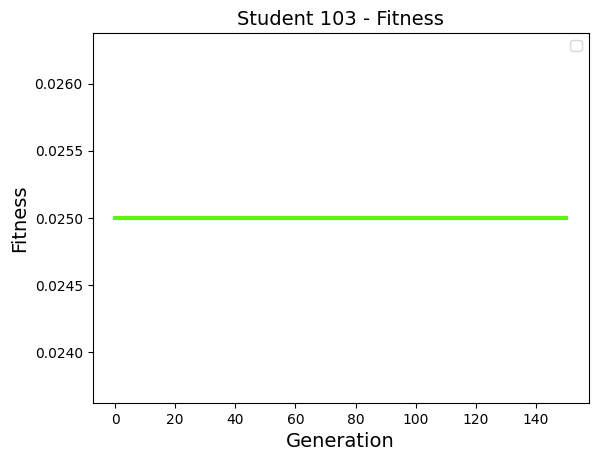


 Fitness plot saved to 'student_103_fitness.png'


In [183]:
# Instantiate the scheduler, run it, and display the final schedule

try:
    # 1. Instantiate the main scheduler class
    student_scheduler = StudentSchedulerGA(student_data, ga_parameters)
    logging.info("StudentSchedulerGA instance created successfully.")
    
    # 2. Run the algorithm
    print("\nRunning the Genetic Algorithm to find the best schedule for the student...")
    start_time = time.time()
    best_schedule = student_scheduler.run()
    end_time = time.time()
    print(f" Execution complete in {end_time - start_time:.2f} seconds.")

    # 3. Display the results
    print("\n" + "="*60)
    print(f"---  Optimal Schedule Found for Student ID: {STUDENT_ID_TO_SCHEDULE}  ---")
    print("="*60)

    schedule_df = pd.DataFrame(best_schedule)
    
    if not schedule_df.empty:
        schedule_df_sorted = schedule_df.sort_values(by=['Day', 'Time'])
        display(schedule_df_sorted[['Day', 'Time', 'course_id', 'teacher_id', 'room_id']])
        
        # 4. Display the fitness plot
        fitness_plot_path = f"student_{STUDENT_ID_TO_SCHEDULE}_fitness.png"
        student_scheduler.ga_instance.plot_fitness(title=f"Student {STUDENT_ID_TO_SCHEDULE} - Fitness", save_dir=fitness_plot_path)
        print(f"\n Fitness plot saved to '{fitness_plot_path}'")
    else:
        print("No viable schedule could be generated with the given constraints.")

except Exception as e:
    logging.error(f"An error occurred during the final run: {e}")